In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## divide the dataset into dependent and independent feature
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
## feature engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [8]:
##concat geo and gender
X.drop(['Geography','Gender'], axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [9]:
X = X.drop(['Geography','Gender'], axis = 1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
X = pd.concat([X,geography,gender],axis = 1)

In [12]:
# splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state = 42)


In [13]:
## feature scalin
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [14]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [15]:
X_test

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
y_train.shape

(8000,)

In [18]:
## creating ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,Dropout

In [37]:
model = Sequential()
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [39]:
model_history = model.fit(X_train,y_train, validation_split=0.33, epochs = 1000, batch_size=10, callbacks = es )

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5423 - accuracy: 0.7826 - val_loss: 0.4793 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.7959 - val_loss: 0.4517 - val_accuracy: 0.7910
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4526 - accuracy: 0.7962 - val_loss: 0.4405 - val_accuracy: 0.7910
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4398 - accuracy: 0.7962 - val_loss: 0.4334 - val_accuracy: 0.7910
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.7962 - val_loss: 0.4275 - val_accuracy: 0.7910
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4266 - accuracy: 0.7962 - val_loss: 0.4217 - val_accuracy: 0.7910
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4238 - accuracy: 0.7962 - val_loss: 0.4127 - val_accuracy:

In [40]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

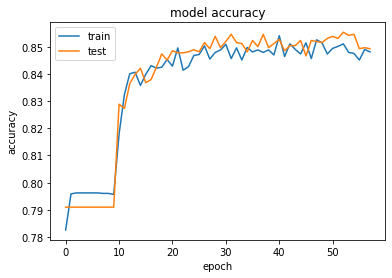

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

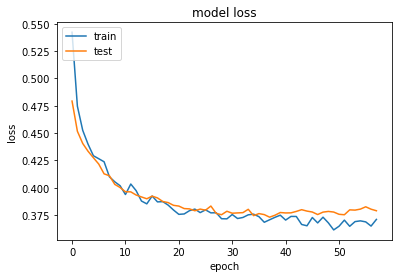

In [44]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[1533,   74],
       [ 207,  186]])

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [48]:
## see weights of ann
model.get_weights()

[array([[-0.18930164,  0.05459027, -0.06945833, -0.3445982 ,  0.13523757,
          0.01316061,  0.01063212,  0.01892489,  0.02166558,  0.19143876,
          0.03164652],
        [ 0.04661049, -0.03591897, -0.4660046 ,  0.18033393,  0.4173763 ,
          0.45606756,  0.31137487,  0.7873526 , -0.810566  ,  0.45892787,
         -0.72651446],
        [-0.14941473, -0.07999723, -0.2962381 , -0.15380834, -0.10550463,
          0.06738705, -0.01656482, -0.0110017 , -0.00163942, -0.08390112,
         -0.01356575],
        [ 0.45766014, -0.16751896, -0.0076687 ,  0.12821497,  0.06011103,
         -0.22174409, -0.30060905,  0.07905843,  0.24018781,  0.28681517,
         -0.12020222],
        [ 0.88385767, -0.01521252,  0.3905961 ,  0.48771206,  0.9682678 ,
         -0.35398182, -1.3009874 , -0.10428435,  0.41900414,  0.7234062 ,
         -0.3157795 ],
        [-0.06675627, -0.3455363 ,  0.1536568 ,  0.38011584,  0.14211085,
          0.2913015 ,  0.09712417,  0.0281157 , -0.637621  , -0.3593742